In [ ]:
from PIL import Image
import numpy as np

# Load the image
with Image.open("one.webp") as im:

    # Since the logo is centrally placed, we'll crop the image to extract the logo.
    # First, we need the image size to determine the crop box.
    width, height = im.size

    # Assuming the logo is in the center, we'll define a square around the center.
    side_length = min(width, height)  # Use the smaller dimension to define the square.
    left = (width - side_length) / 2
    top = (height - side_length) / 2
    right = (width + side_length) / 2
    bottom = (height + side_length) / 2

    # Create the crop box
    crop_box = (left, top, right, bottom)

    # Crop the image to extract the logo.
    logo_image = im.crop(crop_box)

    # Save the extracted logo
    logo_image_path = "extracted_logo.png"
    logo_image.save(logo_image_path)

logo_image_path


'extracted_logo.png'

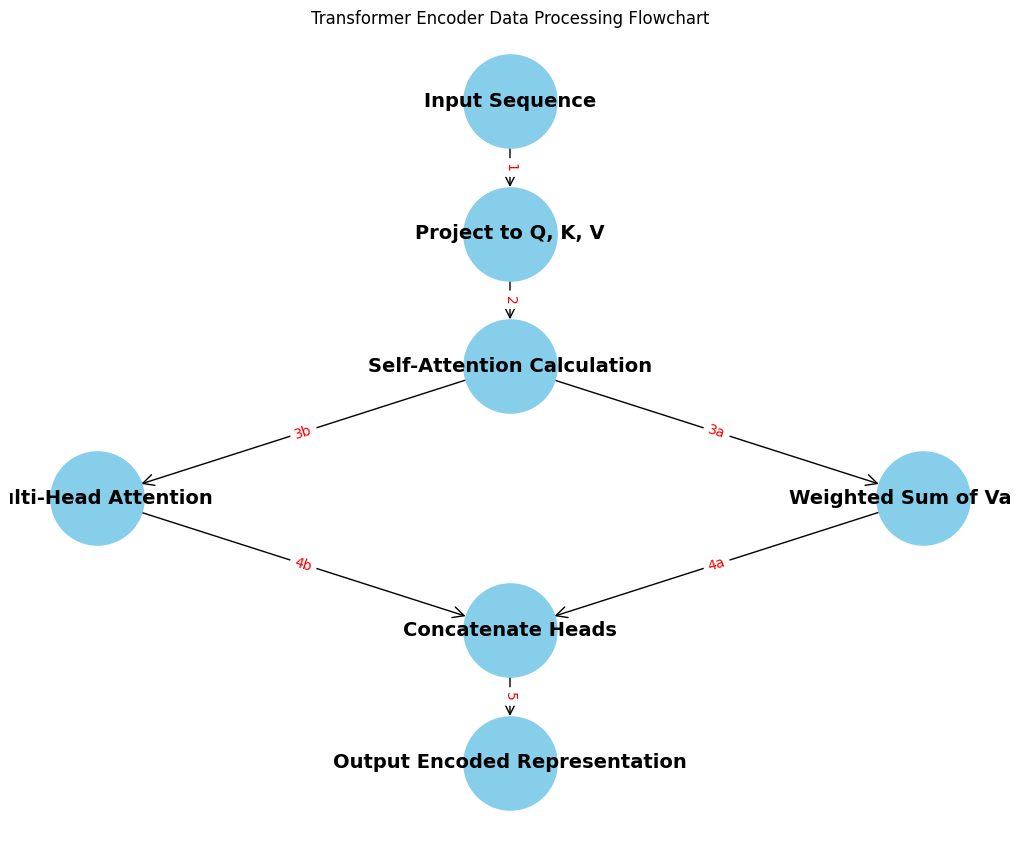

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a function to draw the flowchart with matplotlib
def draw_flowchart():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with their positions
    G.add_node("Input Sequence", pos=(0, 4))
    G.add_node("Project to Q, K, V", pos=(0, 3))
    G.add_node("Self-Attention Calculation", pos=(0, 2))
    G.add_node("Weighted Sum of Values", pos=(1, 1))
    G.add_node("Multi-Head Attention", pos=(-1, 1))
    G.add_node("Concatenate Heads", pos=(0, 0))
    G.add_node("Output Encoded Representation", pos=(0, -1))

    # Add edges with labels
    G.add_edge("Input Sequence", "Project to Q, K, V")
    G.add_edge("Project to Q, K, V", "Self-Attention Calculation")
    G.add_edge("Self-Attention Calculation", "Weighted Sum of Values")
    G.add_edge("Self-Attention Calculation", "Multi-Head Attention")
    G.add_edge("Weighted Sum of Values", "Concatenate Heads")
    G.add_edge("Multi-Head Attention", "Concatenate Heads")
    G.add_edge("Concatenate Heads", "Output Encoded Representation")

    # Define node positions based on the graph layout
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph with positions
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=4500, node_color="skyblue", font_size=14, font_weight='bold', arrowstyle="->", arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={
        ("Input Sequence", "Project to Q, K, V"): "1",
        ("Project to Q, K, V", "Self-Attention Calculation"): "2",
        ("Self-Attention Calculation", "Weighted Sum of Values"): "3a",
        ("Self-Attention Calculation", "Multi-Head Attention"): "3b",
        ("Weighted Sum of Values", "Concatenate Heads"): "4a",
        ("Multi-Head Attention", "Concatenate Heads"): "4b",
        ("Concatenate Heads", "Output Encoded Representation"): "5"
    }, font_color='red')

    # Show the plot
    plt.title('Transformer Encoder Data Processing Flowchart')
    plt.show()

# Call the function to draw the flowchart
draw_flowchart()


##Encoder Working Flow Chart Code

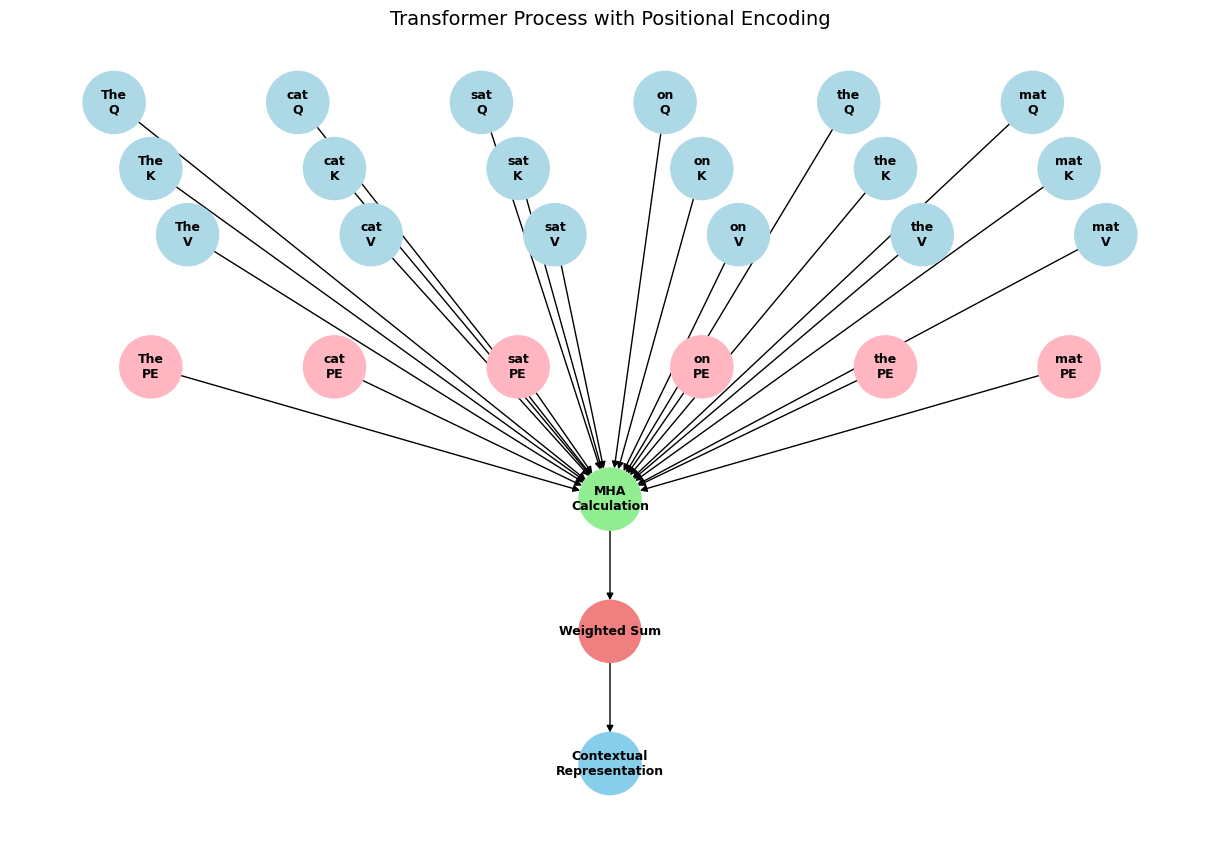

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_transformer_with_positional_encoding():
    sentence = ["The", "cat", "sat", "on", "the", "mat"]
    G = nx.DiGraph()

    # Adding nodes for each word with separate Q, K, V and adding positional encoding
    for i, word in enumerate(sentence):
        for j, component in enumerate(["Q", "K", "V"]):
            node_label = f"{word}\n{component}"
            pos_x = i + j * 0.2 - 0.2  # Offset each Q, K, V horizontally
            pos_y = 2 if component == "V" else 2.5 if component == "K" else 3  # Separate vertically for Q, K, V
            G.add_node(node_label, pos=(pos_x, pos_y), color='lightblue')

        # Add positional encoding node
        pe_label = f"{word}\nPE"
        G.add_node(pe_label, pos=(i, 1), color='lightpink')

    # Adding node for MHA calculation
    G.add_node("MHA\nCalculation", pos=(2.5, 0), color='lightgreen')

    # Adding nodes for weighted sum and output
    G.add_node("Weighted Sum", pos=(2.5, -1), color='lightcoral')
    G.add_node("Contextual\nRepresentation", pos=(2.5, -2), color='skyblue')

    # Adding edges for Q, K, V and PE to MHA calculation
    for word in sentence:
        for component in ["Q", "K", "V"]:
            G.add_edge(f"{word}\n{component}", "MHA\nCalculation", color='black')
        G.add_edge(f"{word}\nPE", "MHA\nCalculation", color='magenta')

    # Adding edges for the rest of the process
    G.add_edge("MHA\nCalculation", "Weighted Sum", color='black')
    G.add_edge("Weighted Sum", "Contextual\nRepresentation", color='black')

    pos = nx.get_node_attributes(G, 'pos')
    colors = nx.get_node_attributes(G, 'color').values()

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color=list(colors), arrows=True, node_size=2000, font_size=9, font_weight='bold')
    plt.title('Transformer Process with Positional Encoding', fontsize=14)
    plt.axis('off')
    plt.show()

draw_transformer_with_positional_encoding()


##Transformer Simple Example

In [ ]:
import torch
import torch.nn as nn
import math


def __init__(self, input_size, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward): This is the constructor of the SimpleTransformer class. It initializes a new instance of the class and sets up the Transformer model with the specified configuration parameters. The parameters are:

input_size: The size of the input embeddings. Each token in the input sequence is represented by a vector of this size.
nhead: The number of heads in the multi-head attention mechanism. Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions.
num_encoder_layers: The number of encoder layers in the Transformer encoder.
num_decoder_layers: The number of decoder layers in the Transformer decoder.
dim_feedforward: The dimension of the feed-forward network model within each Transformer block.
self.transformer = nn.Transformer(...): Here, we instantiate PyTorch's built-in Transformer module with the specified configuration. This module encapsulates the entire Transformer model, including the encoder, decoder, and multi-head attention mechanisms.

self.input_size = input_size: We store the input_size parameter as an instance variable for later use.

Forward Pass: forward Method
def forward(self, src, tgt):: The forward method defines how the model processes input data. In PyTorch, the forward method is automatically called when you pass input data to the model instance.

src: The source sequence input to the model (e.g., an encoded sentence).
tgt: The target sequence input to the model (e.g., the target sentence for a translation task).
src = src * math.sqrt(self.input_size) and tgt = tgt * math.sqrt(self.input_size): These lines scale the source and target input embeddings by the square root of the input size. This scaling is a common practice in Transformer models to prevent the dot product in the self-attention mechanism from growing too large in magnitude.

output = self.transformer(src, tgt): This line passes the scaled source and target sequences through the Transformer model to obtain the output. The nn.Transformer module handles the complex interactions between the encoder and decoder, including self-attention and cross-attention mechanisms.

return output: Finally, the method returns the output of the Transformer model. This output can be used for further processing, depending on the specific task (e.g., classification, translation).

In [ ]:
class SimpleTransformer(nn.Module):
    def __init__(self, input_size, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward):
        super(SimpleTransformer, self).__init__()
        self.transformer = nn.Transformer(d_model=input_size, nhead=nhead, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward)
        self.input_size = input_size

    def forward(self, src, tgt):
        src = src * math.sqrt(self.input_size)
        tgt = tgt * math.sqrt(self.input_size)
        output = self.transformer(src, tgt)
        return output


In [ ]:
# Model parameters
input_size = 512  # size of the input embedding
nhead = 8  # number of heads in the multiheadattention models
num_encoder_layers = 2  # number of sub-encoder-layers in the encoder
num_decoder_layers = 2  # number of sub-decoder-layers in the decoder
dim_feedforward = 2048  # dimension of the feedforward network model

model = SimpleTransformer(input_size, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


For simplicity, let's create some dummy data that represents the source (src) and target (tgt) inputs. Typically, these would be your input sequences, such as sentences in natural language processing tasks, encoded as token IDs and converted into embeddings.

In [ ]:
src = torch.rand((10, 32, input_size))  # (sequence length, batch size, input size)
tgt = torch.rand((20, 32, input_size))  # Target must be of different sequence length


In [ ]:
output = model(src, tgt)
print(output.shape)  # Check the output shape


torch.Size([20, 32, 512])


##Transformers Language Translation Sample impementation (Not good Results )

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import Multi30k
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader



In [ ]:
!python -m spacy download de_core_news_sm

In [ ]:
!pip install 'portalocker>=2.0.0'

In [ ]:
SRC_LANGUAGE = 'de'  # Source language (German in this case)
TGT_LANGUAGE = 'en'  # Target language (English)

# Tokenizer functions for the two languages
src_tokenizer = get_tokenizer('spacy', language='de_core_news_sm')
tgt_tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

# Helper function to yield tokens
def yield_tokens(data_iter, language):
    for data_sample in data_iter:
        yield language(data_sample[0]) if SRC_LANGUAGE == 'de' else language(data_sample[1])

# Load the dataset
train_data, valid_data, test_data = Multi30k(split=('train', 'valid', 'test'), language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))

# Build vocabularies
src_vocab = build_vocab_from_iterator(yield_tokens(train_data, src_tokenizer), specials=["<unk>", "<pad>", "<bos>", "<eos>"])
tgt_vocab = build_vocab_from_iterator(yield_tokens(train_data, tgt_tokenizer), specials=["<unk>", "<pad>", "<bos>", "<eos>"])

src_vocab.set_default_index(src_vocab["<unk>"])
tgt_vocab.set_default_index(tgt_vocab["<unk>"])


/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


In [ ]:
BATCH_SIZE = 128

# Function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(torch.tensor([src_vocab[token] for token in src_tokenizer(src_sample)], dtype=torch.long))
        tgt_batch.append(torch.tensor([tgt_vocab[token] for token in tgt_tokenizer(tgt_sample)], dtype=torch.long))
    src_batch = pad_sequence(src_batch, padding_value=src_vocab["<pad>"])
    tgt_batch = pad_sequence(tgt_batch, padding_value=tgt_vocab["<pad>"])
    return src_batch, tgt_batch

# DataLoader for training data
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_fn)


In [ ]:
import math
class TranslationTransformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, embedding_size=512, nhead=8, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=2048):
        super(TranslationTransformer, self).__init__()
        self.src_embedding = nn.Embedding(src_vocab_size, embedding_size)
        self.tgt_embedding = nn.Embedding(tgt_vocab_size, embedding_size)
        self.transformer = nn.Transformer(d_model=embedding_size, nhead=nhead, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward)
        self.fc_out = nn.Linear(embedding_size, tgt_vocab_size)
        self.embedding_size = embedding_size

    def generate_positional_encodings(self, length):
        position = torch.arange(length).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, self.embedding_size, 2).float() * -(math.log(10000.0) / self.embedding_size))
        positional_encoding = torch.zeros(length, 1, self.embedding_size)
        positional_encoding[:, 0, 0::2] = torch.sin(position * div_term)
        positional_encoding[:, 0, 1::2] = torch.cos(position * div_term)
        return positional_encoding

    def forward(self, src, tgt):
        src_pos = self.generate_positional_encodings(src.size(0)).to(src.device)
        tgt_pos = self.generate_positional_encodings(tgt.size(0)).to(tgt.device)
        src = self.src_embedding(src) + src_pos
        tgt = self.tgt_embedding(tgt) + tgt_pos
        output = self.transformer(src, tgt)
        return self.fc_out(output)



In [ ]:
# Initialize the model
src_vocab_size = len(src_vocab)
tgt_vocab_size = len(tgt_vocab)
model = TranslationTransformer(src_vocab_size, tgt_vocab_size)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Loss function
loss_fn = nn.CrossEntropyLoss(ignore_index=tgt_vocab["<pad>"])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
device

device(type='cuda')

In [ ]:
def train(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    batch_count = 0  # Initialize batch count

    for src, tgt in dataloader:
        src = src.to(device)
        tgt = tgt.to(device)

        optimizer.zero_grad()
        output = model(src, tgt[:-1, :])
        output_dim = output.shape[-1]

        output = output.reshape(-1, output_dim)
        tgt = tgt[1:].reshape(-1)
        loss = loss_fn(output, tgt)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_count += 1  # Increment batch count for each processed batch

    # Use batch_count to calculate the average loss
    average_loss = total_loss / batch_count if batch_count > 0 else 0
    return average_loss


# Example training call for one epoch
num_epochs=10
for epoch in range(num_epochs):
  epoch_loss = train(model, train_dataloader, optimizer, loss_fn, device)
  print(f"Epoch Loss: {epoch_loss}")


Epoch Loss: 0.0704091372550978


#train the save model

In [ ]:
import os

def train_and_save_model(model, dataloader, optimizer, loss_fn, device, num_epochs, save_path, save_best_only=True):
    best_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        batch_count = 0

        for src, tgt in dataloader:
            src = src.to(device)
            tgt = tgt.to(device)

            optimizer.zero_grad()
            output = model(src, tgt[:-1, :])
            output_dim = output.shape[-1]

            output = output.reshape(-1, output_dim)
            tgt = tgt[1:].reshape(-1)
            loss = loss_fn(output, tgt)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batch_count += 1

        average_loss = total_loss / batch_count
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss}")

        # Save the model
        # If save_best_only, save the model only if it has the best loss so far
        if not save_best_only or (average_loss < best_loss):
            best_loss = average_loss
            torch.save(model.state_dict(), save_path)
            print(f"Model saved at epoch {epoch + 1} with loss {average_loss}")

    print(f"Training completed. Best model saved to {save_path}")

# Parameters
num_epochs = 50  # Number of epochs to train
save_path = 'translation_model.pth'  # Path to save the model

# Ensure the save directory exists
#os.makedirs(os.path.dirname(save_path), exist_ok=True)



# Train the model and save
train_and_save_model(model, train_dataloader, optimizer, loss_fn, device, num_epochs, save_path)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


Epoch 1/50, Loss: 0.014593163208260575
Model saved at epoch 1 with loss 0.014593163208260575
Epoch 2/50, Loss: 0.03576990077169489
Epoch 3/50, Loss: 0.0192367302506161
Epoch 4/50, Loss: 0.013391046713020176
Model saved at epoch 4 with loss 0.013391046713020176
Epoch 5/50, Loss: 0.008304785492948958
Model saved at epoch 5 with loss 0.008304785492948958
Epoch 6/50, Loss: 0.01097234097562755
Epoch 7/50, Loss: 0.010477277571422618
Epoch 8/50, Loss: 0.008314130958303037
Epoch 9/50, Loss: 0.018887542970765725
Epoch 10/50, Loss: 0.010565924553979098
Epoch 11/50, Loss: 0.015446120710522428
Epoch 12/50, Loss: 0.04483921096059145
Epoch 13/50, Loss: 0.008330853248865339
Epoch 14/50, Loss: 0.007824893977615105
Model saved at epoch 14 with loss 0.007824893977615105
Epoch 15/50, Loss: 0.004433903991952969
Model saved at epoch 15 with loss 0.004433903991952969
Epoch 16/50, Loss: 0.007251913562860126
Epoch 17/50, Loss: 0.013216330509300503
Epoch 18/50, Loss: 0.00887081927070107
Epoch 19/50, Loss: 0.01

KeyboardInterrupt: 

In [ ]:
# Define the model parameters exactly as they were when the model was saved
src_vocab_size = len(src_vocab)  # Assuming src_vocab is available
tgt_vocab_size = len(tgt_vocab)  # Assuming tgt_vocab is available

# Create the model instance with the same parameters
model2 = TranslationTransformer(src_vocab_size, tgt_vocab_size)

# Load the state dict from the saved file
model_state_dict = torch.load('translation_model.pth', map_location=torch.device('cuda'))

# Apply the state dictionary to the loaded model
model2.load_state_dict(model_state_dict)

# If you're planning to use the model for further training or inference on GPU, don't forget to:
model2.to(device)

# Now the model is ready to be used for inference or further training.


In [ ]:
def evaluate(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src = src.to(device)
            tgt = tgt.to(device)

            output = model(src, tgt[:-1, :])
            output_dim = output.shape[-1]
            output = output.reshape(-1, output_dim)
            tgt = tgt[1:].reshape(-1)
            loss = loss_fn(output, tgt)
            total_loss += loss.item()

    return total_loss / len(dataloader)


In [ ]:
model

In [ ]:
def translate(model, sentence, src_vocab, tgt_vocab, src_tokenizer, device):
    model.eval()
    tokens = [src_vocab['<bos>']] + [src_vocab[token] for token in src_tokenizer(sentence)] + [src_vocab['<eos>']]
    src_tensor = torch.LongTensor(tokens).unsqueeze(1).to(device)
    src_mask = model.generate_square_subsequent_mask(src_tensor.size(0)).to(device)

    tgt_tokens = [tgt_vocab['<bos>']]

    for i in range(100):
        tgt_tensor = torch.LongTensor(tgt_tokens).unsqueeze(1).to(device)
        tgt_mask = model.generate_square_subsequent_mask(tgt_tensor.size(0)).to(device)

        output = model(src_tensor, tgt_tensor, src_mask, tgt_mask)
        output_token = output.argmax(2)[-1].item()
        if output_token == tgt_vocab['<eos>']:
            break
        tgt_tokens.append(output_token)

    translated_sentence = [tgt_vocab.lookup_token(token) for token in tgt_tokens]
    return ' '.join(translated_sentence)


Test Trasnlation

In [ ]:
def translate_sentence(model, sentence, src_vocab, tgt_vocab, src_tokenizer, tgt_tokenizer, device):
    model.eval()  # Put the model in evaluation mode

    # Tokenize the source sentence and convert to indices
    tokens = ["<bos>"] + src_tokenizer(sentence) + ["<eos>"]
    src_indices = [src_vocab[token] for token in tokens]
    src_tensor = torch.tensor(src_indices, dtype=torch.long).unsqueeze(1).to(device)  # Add batch dimension and move to device

    # Start with the initial input for the target, which is the <bos> token
    tgt_indices = [tgt_vocab["<bos>"]]
    for _ in range(100):  # Assume a max length to prevent infinite loops
        tgt_tensor = torch.tensor(tgt_indices, dtype=torch.long).unsqueeze(1).to(device)
        with torch.no_grad():
            output = model(src_tensor, tgt_tensor)

        # Get the last word in the output
        next_word = output.argmax(2)[-1, 0].item()
        tgt_indices.append(next_word)  # Add to the list of target indices

        # Stop if <eos> is generated
        if next_word == tgt_vocab["<eos>"]:
            break

    # Convert the indices to words
    translated_sentence = [tgt_vocab.lookup_token(idx) for idx in tgt_indices[1:]]  # Skip <bos> token in the output

    # Return the translated sentence as a string
    return ' '.join(translated_sentence)

# Example usage
sentence = "Ein schnelles Auto."
translated_sentence = translate_sentence(model2, sentence, src_vocab, tgt_vocab, src_tokenizer, tgt_tokenizer, device)
print(f"Translated sentence: {translated_sentence}")


Translated sentence: Lou Lou Lou Hodo Hodo Los Los Los Los Columbia Columbia Columbia Columbia Columbia iPhone iPhone iPhone iPhone 2010 Madison Madison Madison . . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> r <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> ; <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>


## **Complete Transformer Language Translation Implementation with custom encoder decoder layers **

In [ ]:
!pip install -U torchdata
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

In [ ]:
!pip install 'portalocker>=2.0.0'

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import multi30k, Multi30k
from typing import Iterable, List


# We need to modify the URLs for the dataset since the links to the original dataset are broken
# Refer to https://github.com/pytorch/text/issues/1756#issuecomment-1163664163 for more info
multi30k.URL["train"] = "https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/training.tar.gz"
multi30k.URL["valid"] = "https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/validation.tar.gz"

SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

# Place-holders
token_transform = {}
vocab_transform = {}

In [ ]:
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')


# helper function to yield list of tokens
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(train_iter, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Set ``UNK_IDX`` as the default index. This index is returned when the token is not found.
# If not set, it throws ``RuntimeError`` when the queried token is not found in the Vocabulary.
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

In [ ]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

In [ ]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [ ]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# ``src`` and ``tgt`` language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

In [ ]:
from torch.utils.data import DataLoader

def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(list(train_dataloader))


def evaluate(model):
    model.eval()
    losses = 0

    val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(list(val_dataloader))

In [ ]:
from timeit import default_timer as timer
NUM_EPOCHS = 18

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))




In [ ]:
# function to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


# actual function to translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

In [ ]:
print(translate(transformer, "Eine Gruppe von Menschen steht vor einem Iglu ."))

 A group of people standing in front of an igloo 


In [ ]:


translate(transformer, "In einem kleinen Haus am Waldrand wohnte ein kleines Mädchen namens Liesel. Sie hatte langes blondes Haar und große blaue Augen")

" In a small house , there is a little girl 's bandanna with long blond - haired , long hair and blue eyes . "

In [ ]:
translate(transformer,"Deutsche Bahn streikt am Wochenende - Züge fallen aus . ")

' Large rock track player is participating in the dirty sport . '

In [ ]:
evaluate(transformer)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


1.9286050647497177

plat uml codes


In [ ]:
Plant UML Coder : Encoder

@startuml Decoder-Flow
!theme plain

(*) --> "Input Embedding"
--> "Positional Encoding"
--> "Masked Self-Attention Mechanism"
--> "Feed-Forward Network"

"Masked Self-Attention Mechanism" --> "Add & Norm 1"
"Feed-Forward Network" --> "Add & Norm 2"
--> "Output Generation"
--> (*)
@enduml

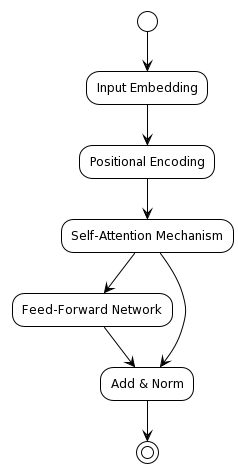

In [ ]:
#Deocder Architecture
@startuml
!theme plain

start
:Input Embedding;
:Positional Encoding;
while (More Layers?) is (yes)
  :Masked Self-Attention Mechanism;
  :Add & Norm 1;
  :Feed-Forward Network;
  :Add & Norm 2;
endwhile (no)
:Output Generation;
stop
@enduml

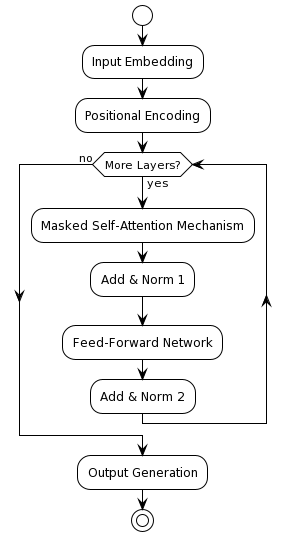

In [ ]:
#Encoder-Decoder Diagram

@startuml
!theme plain

|Encoder|
start
:Input Embedding;
:Positional Encoding;
while (More Encoder Layers?) is (yes)
  :Self-Attention Mechanism;
  :Add & Norm 1;
  :Feed-Forward Network;
  :Add & Norm 2;
endwhile (no)
|Decoder|
:Decoder Input Embedding;
:Decoder Positional Encoding;
while (More Decoder Layers?) is (yes)
  :Masked Self-Attention Mechanism;
  :Add & Norm 1;
  :Encoder-Decoder Attention Mechanism;
  :Add & Norm 2;
  :Feed-Forward Network;
  :Add & Norm 3;
endwhile (no)
:Output Generation;
stop
@enduml

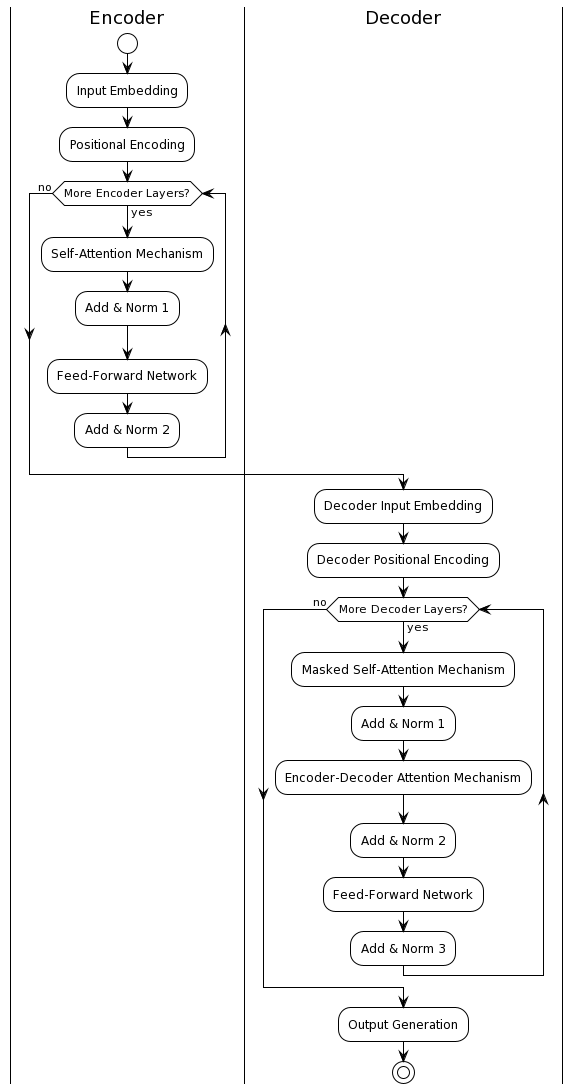

In [ ]:
#Vision transformer processing Plant UML code :

@startuml
participant "Input Image" as Input
participant "Patch Extraction" as Patches
participant "Linear Projection" as Linear
participant "Positional Encoding" as Positional
participant "Transformer Encoder" as Encoder
participant "Classification Head" as Classifier

Input -> Patches: Divide into 16x16 patches
Patches -> Linear: Flatten & project each patch
Linear -> Positional: Add positional encodings
Positional -> Encoder: Process sequence
Encoder -> Classifier: Use [CLS] token for classification
Classifier -> Input: Output class probability
@enduml

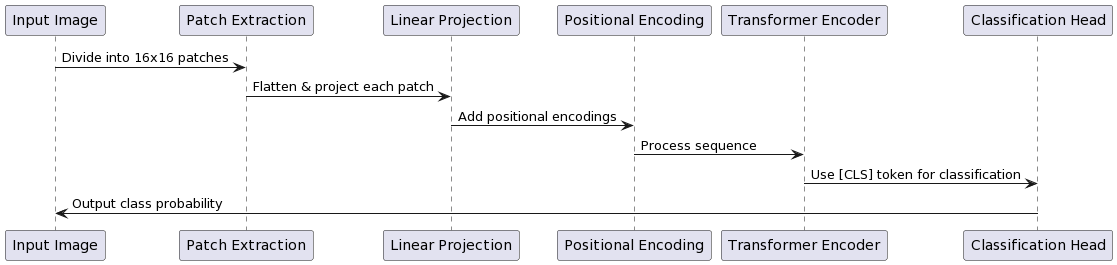

##Vision Transformer Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math


In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super().__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.num_patches = (img_size // patch_size) * (img_size // patch_size)

    def forward(self, x):
        x = self.proj(x)  # B, C, H, W -> B, E, H', W'
        x = x.flatten(2)  # B, E, N (N is the number of patches)
        x = x.transpose(1, 2)  # B, N, E
        return x



In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))  # +1 for cls_token

    def forward(self, x):
        return x + self.pos_embed


In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim),
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        src2 = self.norm1(src)
        attn_output, _ = self.self_attn(src2, src2, src2)
        src = src + self.dropout(attn_output)
        src2 = self.norm2(src)
        src = src + self.dropout(self.ff(src2))
        return src


In [ ]:
class VisionTransformer(nn.Module):
    def __init__(self, img_size=32, patch_size=4, in_channels=3, num_classes=10, embed_dim=768, num_heads=8, num_layers=1, ff_dim=2048):
        super().__init__()
        num_patches = (img_size // patch_size) ** 2
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = PositionalEncoding(num_patches, embed_dim)
        self.transformer_encoder = nn.Sequential(*[TransformerEncoder(embed_dim, num_heads, ff_dim) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        cls_tokens = self.cls_token.expand(x.size(0), -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = self.pos_embed(x)
        x = self.transformer_encoder(x)
        x = self.norm(x[:, 0])
        x = self.head(x)
        return x


In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionTransformer().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


In [ ]:
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(train_loader)}')


KeyboardInterrupt: 

#graphviz Diagram

In [ ]:
from graphviz import Digraph

# Create a Digraph object for a flowchart
dot = Digraph(format='png', comment='Decoder Process Flowchart')

# Add nodes
dot.node('1', 'Input from Encoder\n(Contextual Representations)')
dot.node('2', 'Start Token\n(<START>, Token Embedding + Positional Encoding)')
dot.node('3', 'Self-Attention\n(Generated Tokens)')
dot.node('4', 'Cross-Attention\n(Q from Decoder, K & V from Encoder Outputs)')
dot.node('5', 'Predict First Word\n(e.g., "Bonjour")')
dot.node('6', 'Feed Generated Word\n(Update Sequence)')
dot.node('7', 'Repeat Cross-Attention\n(Align Input with Sequence)')
dot.node('8', 'Predict Next Word\n(e.g., "Comment")')
dot.node('9', 'Repeat Until End Token\n(Final Output Sequence)')

# Add edges
dot.edges(['12', '23', '34', '45', '56', '67', '78', '89'])
# Add loop for repeating process
dot.edge('8', '6', label='Repeat')

# Render and display the flowchart
output_path = 'one.png'
dot.render(output_path, view=True)


'one.png.png'

In [ ]:
from graphviz import Digraph

# Create a beautified Digraph object for the flowchart
beautified_dot = Digraph(format='png', comment='Decoder Process Flowchart', engine='dot')

# Add nodes with additional styles for beautification
beautified_dot.attr('node', shape='box', style='rounded,filled', color='lightblue', fontname='Helvetica', fontsize='10')
beautified_dot.node('1', 'Input from Encoder\n(Contextual Representations)')
beautified_dot.node('2', 'Start Token\n(<START>, Token Embedding + Positional Encoding)')
beautified_dot.node('3', 'Self-Attention\n(Generated Tokens)')
beautified_dot.node('4', 'Cross-Attention\n(Q from Decoder, K & V from Encoder Outputs)')
beautified_dot.node('5', 'Predict First Word\n(e.g., "Bonjour")')
beautified_dot.node('6', 'Feed Generated Word\n(Update Sequence)')
beautified_dot.node('7', 'Repeat Cross-Attention\n(Align Input with Sequence)')
beautified_dot.node('8', 'Predict Next Word\n(e.g., "Comment")')
beautified_dot.node('9', 'Repeat Until End Token\n(Final Output Sequence)')

# Add edges with improved styling
beautified_dot.attr('edge', arrowhead='vee', arrowsize='0.8', color='gray')
beautified_dot.edges(['12', '23', '34', '45', '56', '67', '78', '89'])

# Add loop with label for repeating process
beautified_dot.edge('8', '6', label='Repeat', fontcolor='red', color='red')

# Render and display the beautified flowchart
beautified_output_path = 'beautified_decoder_flowchart'
beautified_dot.render(beautified_output_path, view=True)


'beautified_decoder_flowchart.png'

In [ ]:
# Create a detailed and beautified Digraph object for the flowchart
detailed_dot = Digraph(format='png', comment='Decoder Process Flowchart with Examples', engine='dot')

# Add nodes with detailed descriptions and examples
detailed_dot.attr('node', shape='box', style='rounded,filled', color='lightblue', fontname='Helvetica', fontsize='13')

# Adding descriptive nodes
detailed_dot.node('1', 'Input from Encoder\n(Contextual Representations)\nExamples:\n"Hello" → [1.1, 0.5, 0.8]\n"how" → [0.9, 0.7, 0.6]\n"are" → [1.0, 0.4, 0.9]\n"you" → [1.2, 0.3, 1.1]')
detailed_dot.node('2', 'Start Token\n(<START>, Token Embedding + Positional Encoding)\nExample:\nToken Embedding: [0.8, 0.4, 0.6]')
detailed_dot.node('3', 'Self-Attention\n(Focus on Generated Tokens)\nExample:\nCurrent Sequence: <START>')
detailed_dot.node('4', 'Cross-Attention\n(Align Q with K & V from Encoder)\nExample:\nAlign <START> with Encoder Outputs')
detailed_dot.node('5', 'Predict First Word\n(e.g., "Bonjour")\nUsing combined Self-Attention and Cross-Attention')
detailed_dot.node('6', 'Feed Generated Word to decoder\n(Update Input Sequence)\nExample:\nSequence becomes: <START> → "Bonjour"')
detailed_dot.node('7', 'Repeat Cross-Attention\n(Align Input with Sequence)\nExample:\nAlign "Bonjour" with "Hello" and\nfocus on "how"')
detailed_dot.node('8', 'Predict Next Word\n(e.g., "Comment")\nUpdate Sequence: <START> → "Bonjour" → "Comment"')
detailed_dot.node('9', 'Repeat Until End Token\n(Final Output Sequence)\nExample:\n<START> → "Bonjour" → "Comment" → "ça" → "va" → <END>')

# Add edges with improved styling
detailed_dot.attr('edge', arrowhead='vee', arrowsize='1.2', color='darkblue',fontname='Helvetica', fontsize='10')
detailed_dot.edges(['12', '23', '34', '45', '56', '67', '78', '89'])

# Add loop with label for repeating process
detailed_dot.edge('6', '7',  fontcolor='red', color='red')
detailed_dot.edge('7', '8', fontcolor='red', color='red')
detailed_dot.edge('8', '6', label='Repeat', fontcolor='red', color='red')

# Render and display the detailed flowchart
detailed_output_path = 'detailed_decoder_flowchart'
detailed_dot.render(detailed_output_path, view=True)


'detailed_decoder_flowchart.png'

In [ ]:
# Create a beautified simple diagram for the decoder process
beautified_simple_dot = Digraph(format='png', comment='Beautified Simple Decoder Diagram', engine='dot')

# Add nodes with enhanced styling
beautified_simple_dot.attr('node', shape='ellipse', style='filled', color='lightblue', fontname='Helvetica', fontsize='12')
beautified_simple_dot.node('input', 'Input Sentence\n("Hello, how are you")')
beautified_simple_dot.node('encoder', 'Encoder\n(Transforms Input to Context)')
beautified_simple_dot.node('decoder_start', 'Decoder\n(Begins with <START>)')
beautified_simple_dot.node('attention', 'Attention Mechanism\n(Focus on Relevant Input)')
beautified_simple_dot.node('word_1', 'Predicted Word 1\n("Bonjour")')
beautified_simple_dot.node('word_2', 'Predicted Word 2\n("comment")')
beautified_simple_dot.node('repeat', 'Repeat Process\n(Until <END>)')
beautified_simple_dot.node('output', 'Final Output\n("Bonjour comment ça va")')

# Add edges with enhanced styling
beautified_simple_dot.attr('edge', color='darkblue', arrowhead='vee', arrowsize='1.2', fontname='Helvetica', fontsize='10')

beautified_simple_dot.edges([
    ('input', 'encoder'),
    ('encoder', 'decoder_start'),
    ('decoder_start', 'attention'),
    ('attention', 'word_1'),
    ('word_1', 'attention'),
    ('attention', 'word_2'),
    ('word_2', 'attention'),
    ('attention', 'repeat'),
    ('repeat', 'output')
])

# Render and display the beautified simple diagram
beautified_simple_output_path = 'beautified_simple_decoder_diagram'
beautified_simple_dot.render(beautified_simple_output_path, view=True)


'beautified_simple_decoder_diagram.png'